In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./train.csv')

In [3]:
df.drop('SAMPLE_ID', axis=1, inplace=True)

| Variable           | Description                                                          | Unit    |
|:-------------------|:---------------------------------------------------------------------|:--------|
| ARI_CO             | 도착항의 소속국가(도착항 앞 2글자)                                   |         |
| ARI_PO             | 도착항의 항구명(도착항 뒤 글자)                                      |         |
| SHIP_TYPE_CATEGORY | 선종 통합 바탕으로 5대 선종으로 분류                                 |         |
| DIST               | 정박지(ber_port)와 접안지 사이의 거리                                | km      |
| ATA                | anc_port에 도착한 시점의 utc. 실제 정박 시각(Actual Time of Arrival) | hour    |
| ID                 | 선박식별 일련번호                                                    |         |
| BREADTH            | 선박의 폭                                                            | m       |
| BUILT              | 선박의 연령                                                          | year    |
| DEADWEIGHT         | 선박의 재화중량톤수                                                  | ton     |
| DEPTH              | 선박의 깊이                                                          | m       |
| DRAUGHT            | 흘수 높이                                                            | m       |
| GT                 | 용적톤수(Gross Tonnage)값                                            | GT(m^3) |
| LENGTH             | 선박의 길이                                                          | m       |
| SHIPMANAGER        | 선박 소유주                                                          |         |
| FLAG               | 선박의 국적                                                          |         |
| U_WIND             | 풍향 u벡터                                                           | m/s     |
| V_WIND             | 풍향 v벡터                                                           | m/s     |
| AIR_TEMPERATURE    | 기온                                                                 | ºC      |
| BN                 | 보퍼트 풍력 계급                                                     |         |
| ATA_LT             | anc_port에 도착한 시점의 현지 정박 시각(Local Time of Arrival)       | hour    |
| PORT_SIZE          | 접안지 폴리곤 영역의 크기                                            | km^2    |
| CI_HOUR            | 대기시간 

In [4]:
df.columns

Index(['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'DIST', 'ATA', 'ID',
       'BREADTH', 'BUILT', 'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT', 'LENGTH',
       'SHIPMANAGER', 'FLAG', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN',
       'ATA_LT', 'DUBAI', 'BRENT', 'WTI', 'BDI_ADJ', 'PORT_SIZE', 'CI_HOUR'],
      dtype='object')

In [5]:
df['ARI_CO'].unique()

array(['CN', 'JP', 'RU', 'AU', 'SG', 'ZA', 'KR', 'TW', 'TT', 'ID', 'BR',
       'QA', 'LV', 'MZ', 'US', 'IN', 'UA', 'CA', 'MY', 'PE', 'VN', 'FI',
       'CL', 'VE', 'PH'], dtype=object)

In [6]:
for i in df.columns:
    print(i)
    print(len(df[i].unique()))
    print('----------------')
    
print('데이터 총 개수 : ',len(df))

ARI_CO
25
----------------
ARI_PO
103
----------------
SHIP_TYPE_CATEGORY
4
----------------
DIST
219708
----------------
ATA
317850
----------------
ID
24764
----------------
BREADTH
7
----------------
BUILT
62
----------------
DEADWEIGHT
1961
----------------
DEPTH
5
----------------
DRAUGHT
4
----------------
GT
1780
----------------
LENGTH
38
----------------
SHIPMANAGER
6511
----------------
FLAG
123
----------------
U_WIND
2619
----------------
V_WIND
2945
----------------
AIR_TEMPERATURE
704
----------------
BN
78038
----------------
ATA_LT
24
----------------
DUBAI
1789
----------------
BRENT
1850
----------------
WTI
1785
----------------
BDI_ADJ
2010
----------------
PORT_SIZE
101
----------------
CI_HOUR
169615
----------------
데이터 총 개수 :  367441


In [7]:
df.describe()

,DIST,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR
count,367441.000000,367440.000000,367441.000000,367441.000000,367440.000000,367440.000000,367441.000000,367440.000000,213955.000000,213955.000000,213076.000000,213955.000000,367441.000000,367441.000000,367441.00000,367441.000000,367441.000000,367441.000000,367441.000000
mean,19.315929,30.550239,14.746082,63588.867056,16.476540,11.086708,41346.606612,205.114468,-0.297587,-0.262955,18.867344,2.706476,11.837903,65.533814,67.55712,63.209494,1348.251333,0.000877,61.877118
std,30.903272,10.957441,7.040392,63558.705308,6.047015,4.600020,39311.578997,75.867383,3.365912,3.735113,9.727090,1.387629,6.645665,20.916641,20.98516,20.630433,738.961048,0.000838,170.575224
min,0.000000,10.000000,0.000000,100.000000,0.000000,0.000000,150.000000,20.000000,-25.330000,-21.450000,-32.200000,0.000000,0.000000,13.520000,19.33000,-37.630000,286.802297,0.000005,0.000000
25%,0.000000,20.000000,10.000000,14400.000000,10.000000,10.000000,10000.000000,150.000000,-2.150000,-2.280000,12.200000,1.804286,7.000000,50.020000,51.46000,48.360000,836.349201,0.000142,0.000000
50%,6.929929,30.000000,13.000000,47400.000000,20.000000,10.000000,30700.000000,190.000000,-0.130000,0.000000,21.600000,2.618063,12.000000,62.930000,64.62000,59.140000,1187.573732,0.000552,7.949444
75%,25.693063,40.000000,18.000000,81400.000000,20.000000,10.000000,52100.000000,260.000000,1.540000,2.000000,26.600000,3.556008,17.000000,76.880000,79.30000,74.250000,1660.987616,0.001614,49.153333
max,199.980651,60.000000,80.000000,404000.000000,30.000000,20.000000,237000.000000,400.000000,17.910000,29.690000,47.600000,11.179660,23.000000,127.860000,127.98000,123.700000,4795.865609,0.002615,2159.130556


In [8]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

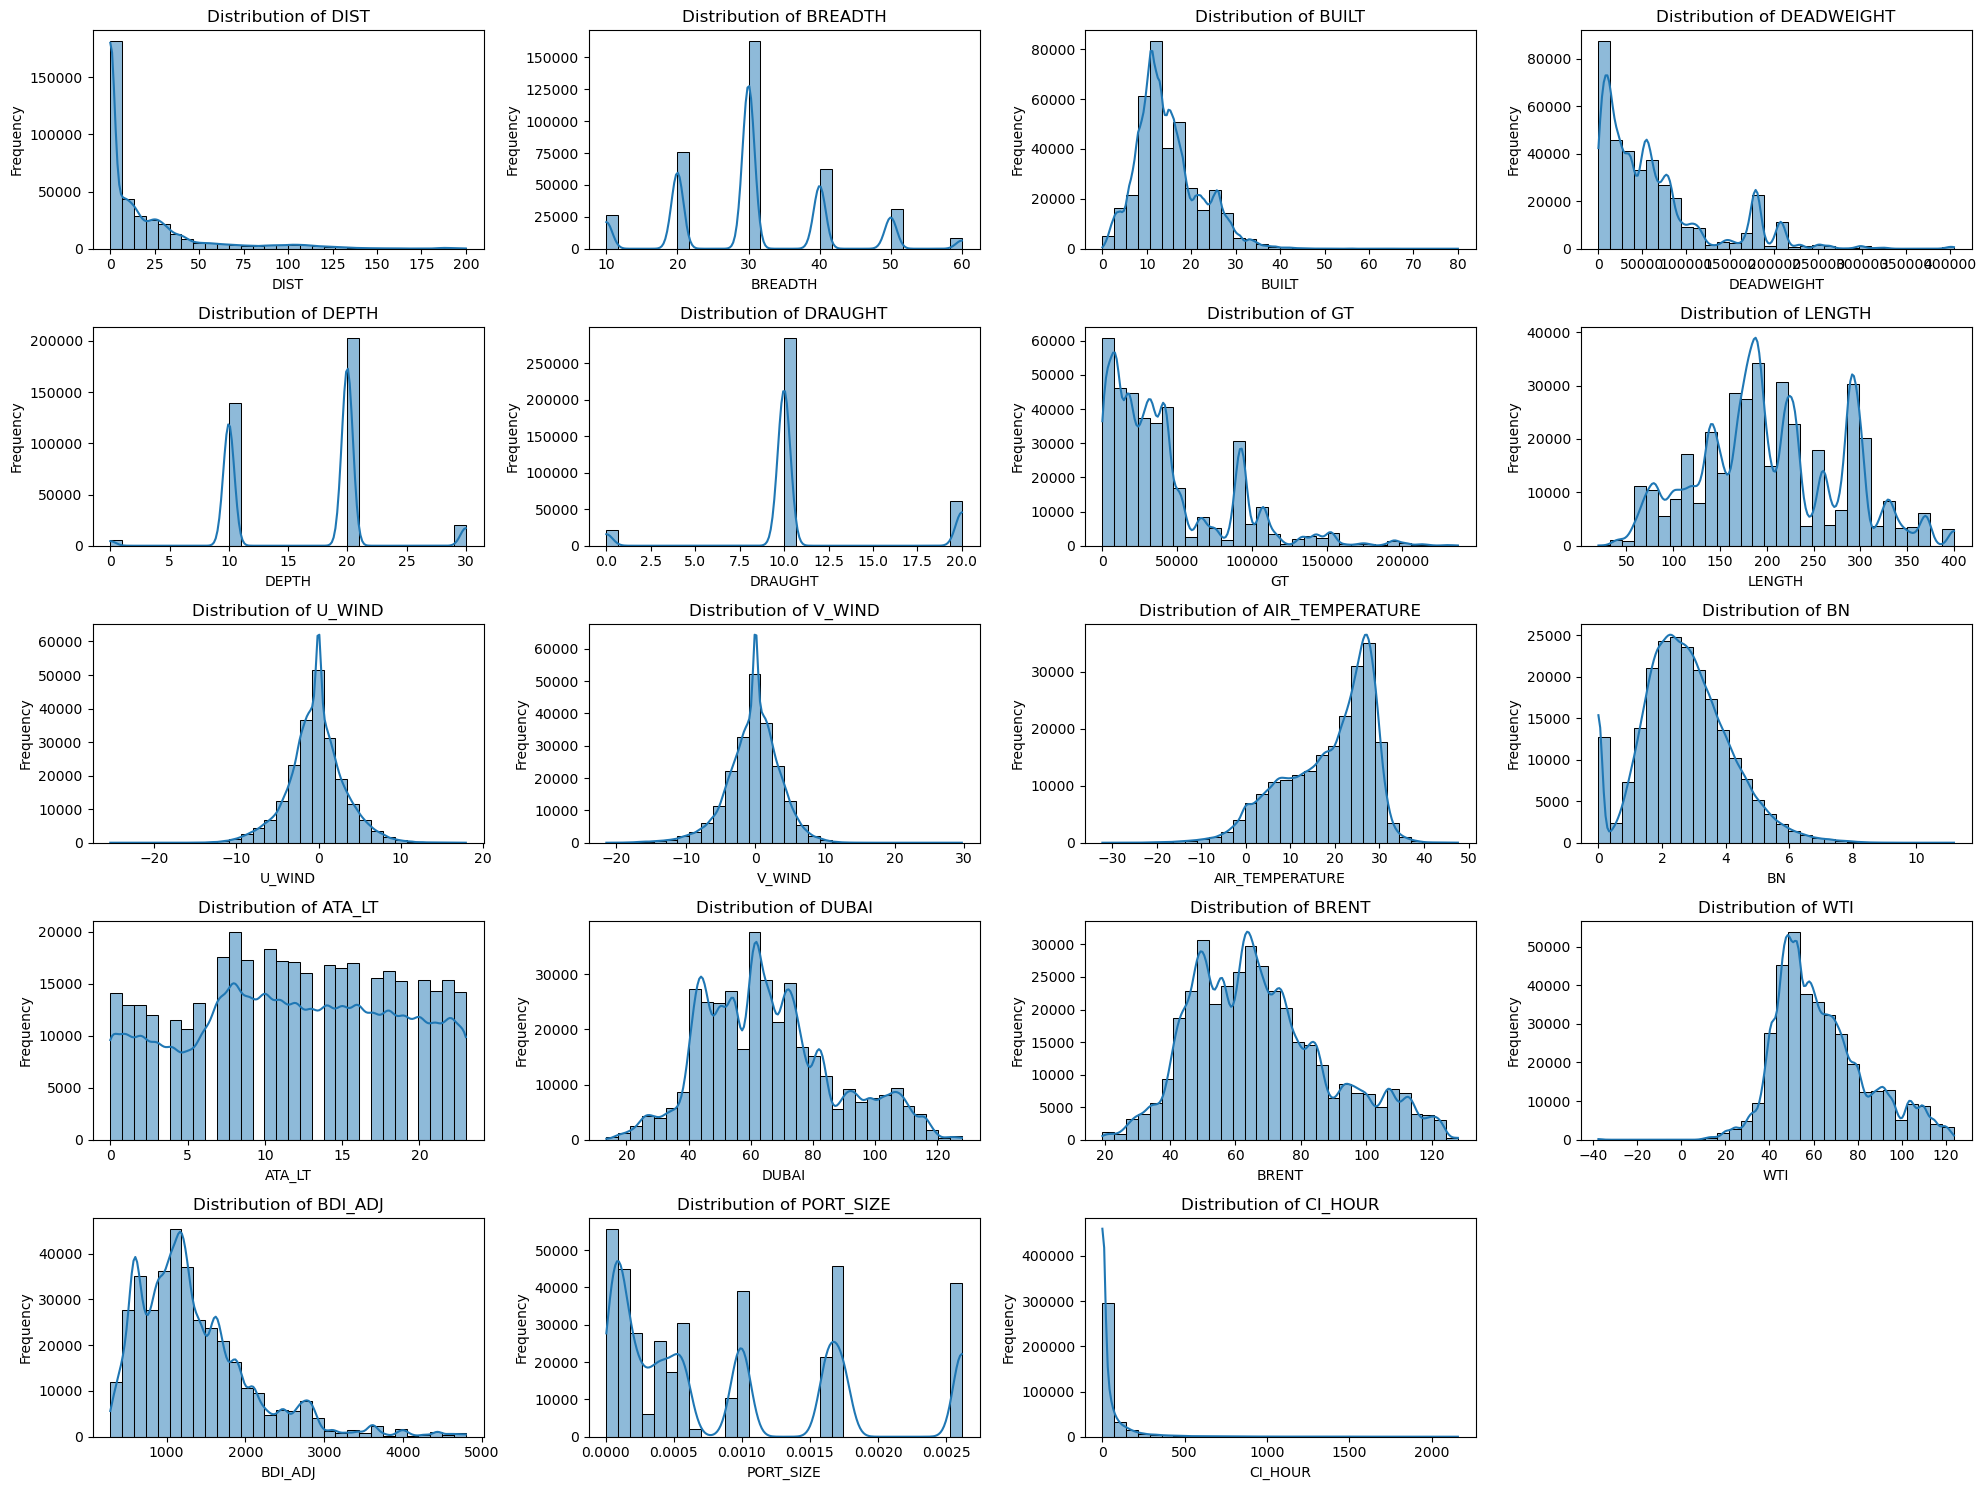

In [9]:
# 샘플링된 데이터로 수치형 변수의 분포를 확인
plt.figure(figsize = (20, 15))

for i, var in enumerate(numeric_columns):
    plt.subplot(5, 4, i+1)
    sns.histplot(df[var], bins = 30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [10]:
categorical_vars = df.select_dtypes(include = ['object']).columns

plt.figure(figsize=(15, 10))

for i, var in enumerate(categorical_vars):
    plt.subplot(2, 2, i+1)
    sns.countplot(y = var, data = df, order = df[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.xlabel('Count')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

In [11]:
categorical_vars

Index(['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'ATA', 'ID', 'SHIPMANAGER',
       'FLAG'],
      dtype='object')

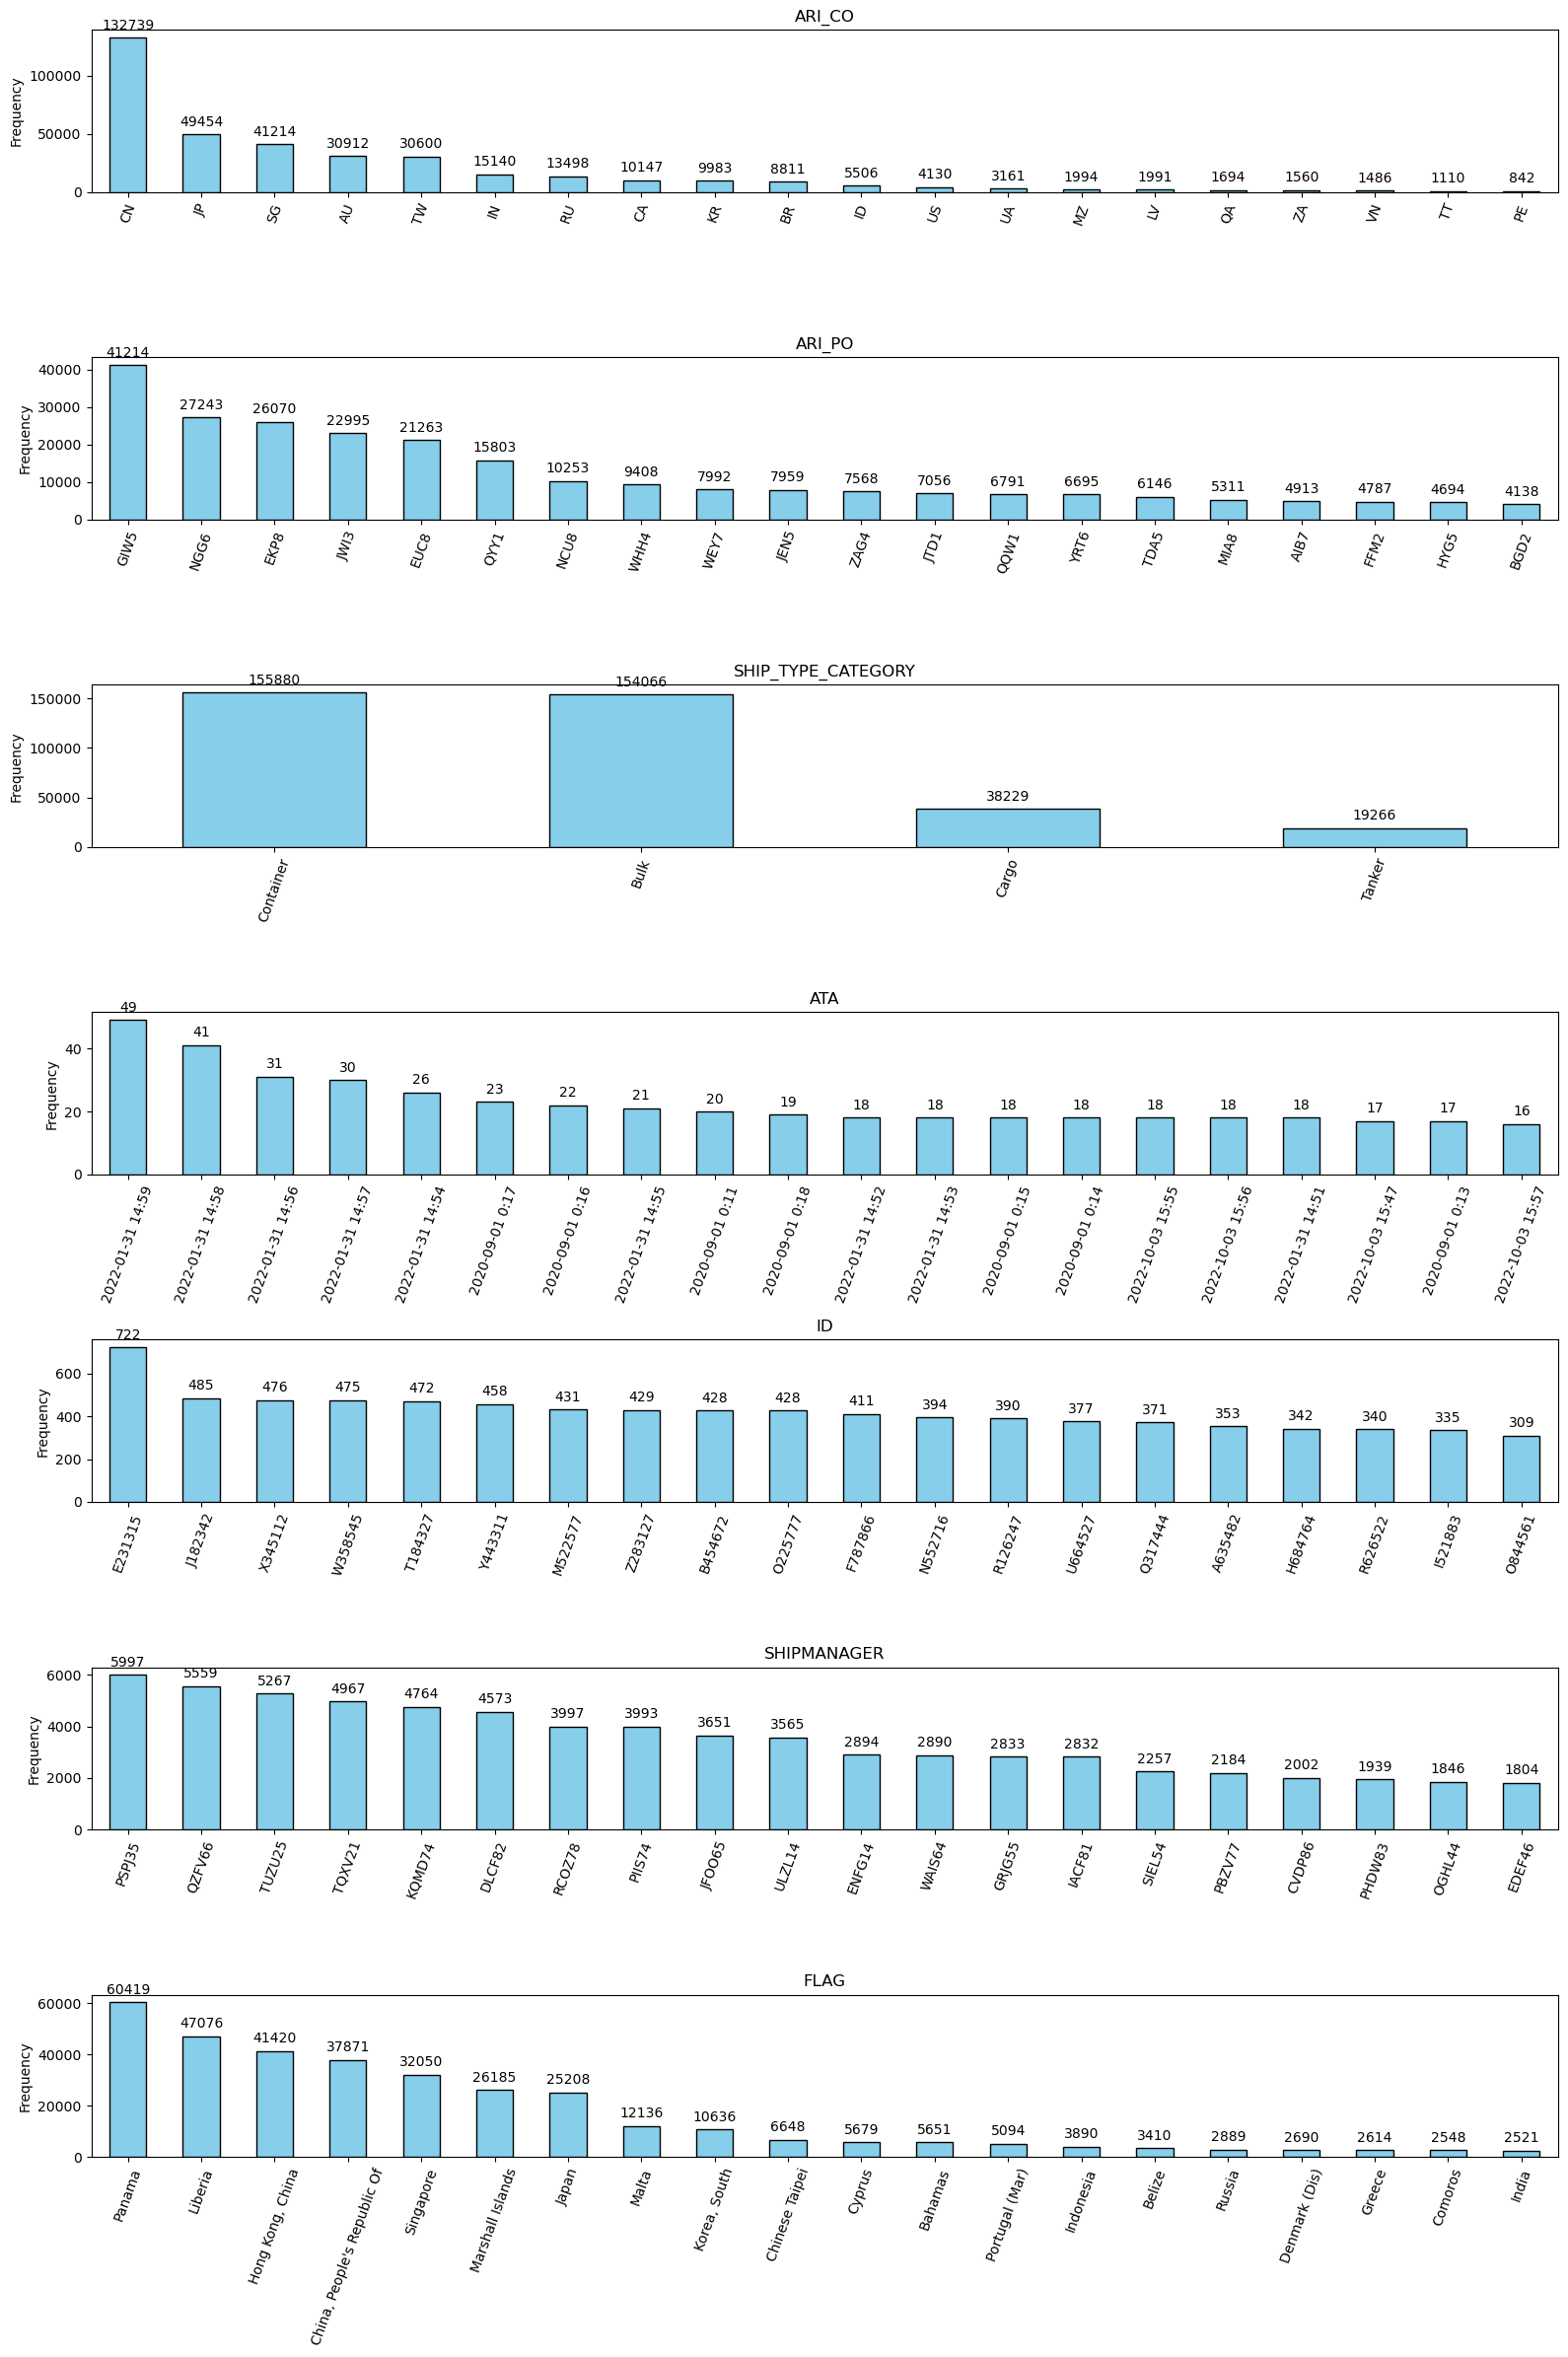

In [12]:
# 위에 코드 너무 오래걸려서 top n개 선정해서 plot

top_n = 20

plt.figure(figsize=(16, 24))

for i, cat_var in enumerate(categorical_vars):
    # 상위 N개의 고유한 값과 그 빈도를 선택합니다.
    top_values = df[cat_var].value_counts().nlargest(top_n)
    
    ax = plt.subplot(len(categorical_vars), 1, i+1)
    top_values.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(cat_var)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    
    # 각 막대 위에 값을 표시
    for p in ax.patches:
        ax.annotate(str(p.get_height()), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', 
                    va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

# 그래프를 화면에 표시합니다.
plt.tight_layout()
plt.show()

In [13]:
cor = df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_15764\2226764872.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


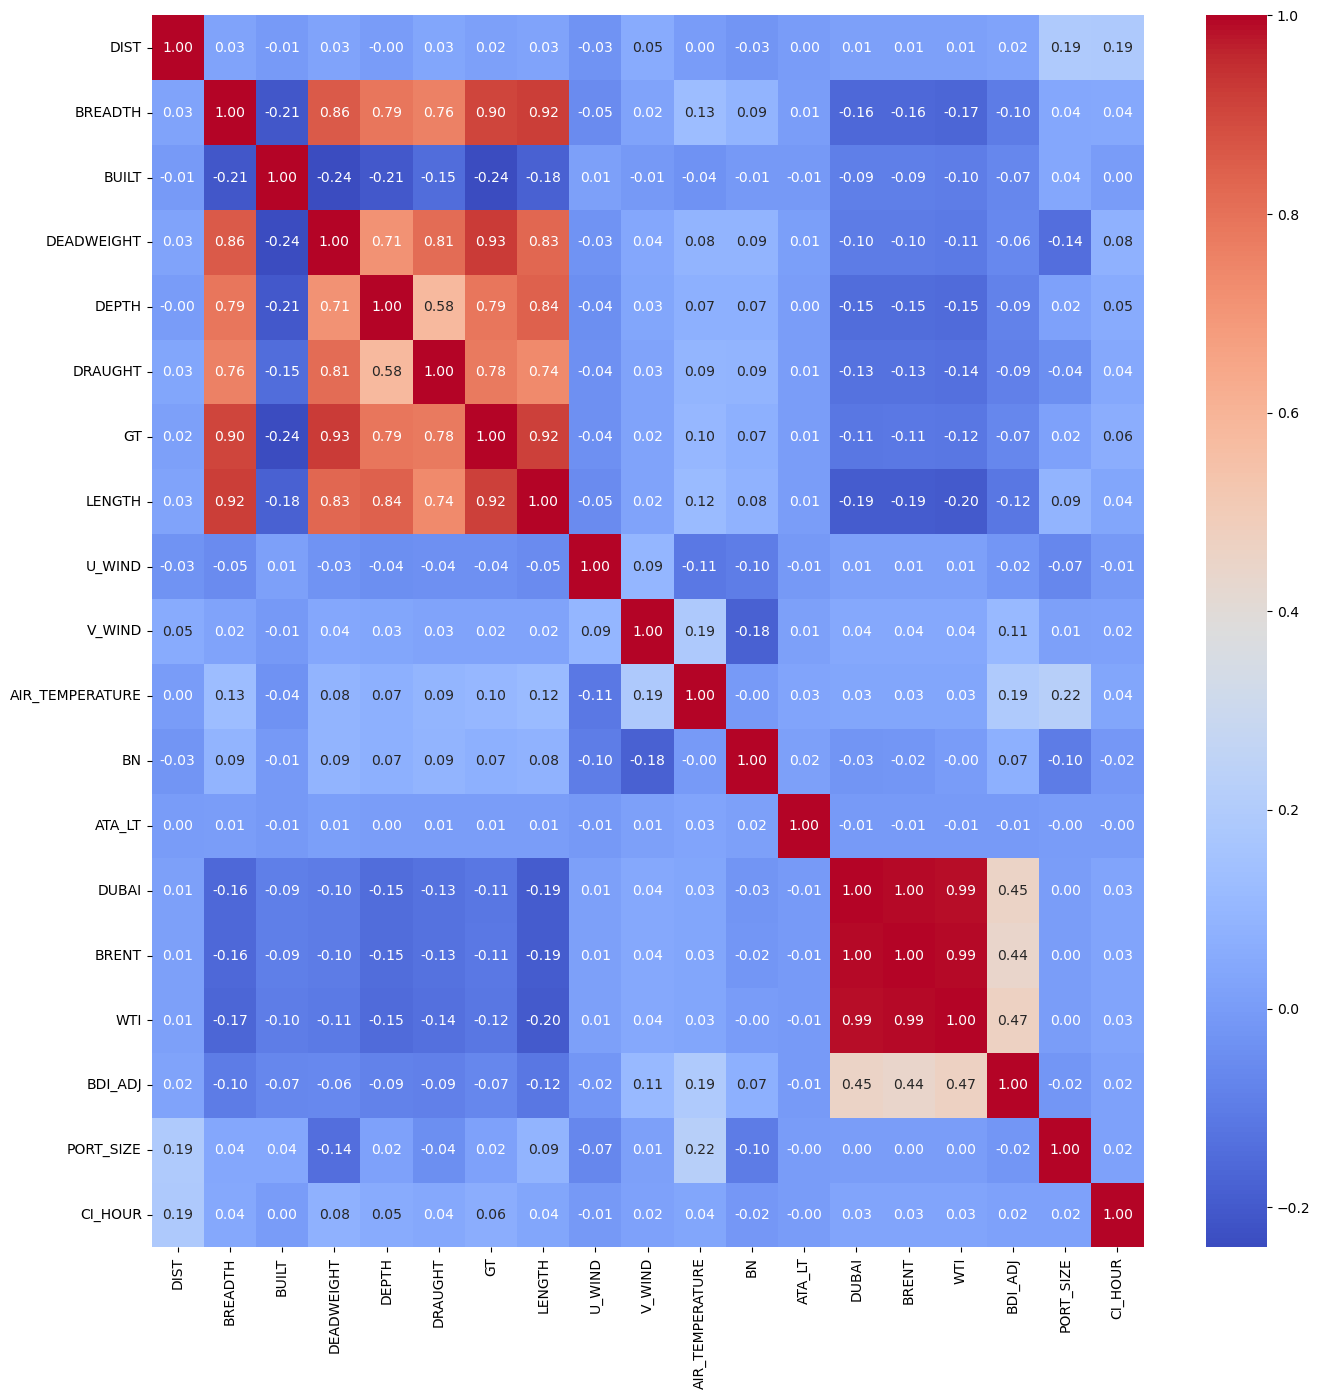

In [14]:
plt.figure(figsize = (16,16))
sns.heatmap(cor, annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.show()

In [15]:
correlations = df[numeric_columns].corr()['CI_HOUR'].drop('CI_HOUR').sort_values(ascending=False)

In [16]:
correlations

DIST               0.189469
DEADWEIGHT         0.078274
GT                 0.059959
DEPTH              0.052184
BREADTH            0.043974
DRAUGHT            0.040560
LENGTH             0.035531
AIR_TEMPERATURE    0.035520
WTI                0.029377
DUBAI              0.029129
BRENT              0.029091
PORT_SIZE          0.020102
BDI_ADJ            0.019690
V_WIND             0.017608
BUILT              0.001588
ATA_LT            -0.000283
U_WIND            -0.012149
BN                -0.016452
Name: CI_HOUR, dtype: float64

<Axes: >

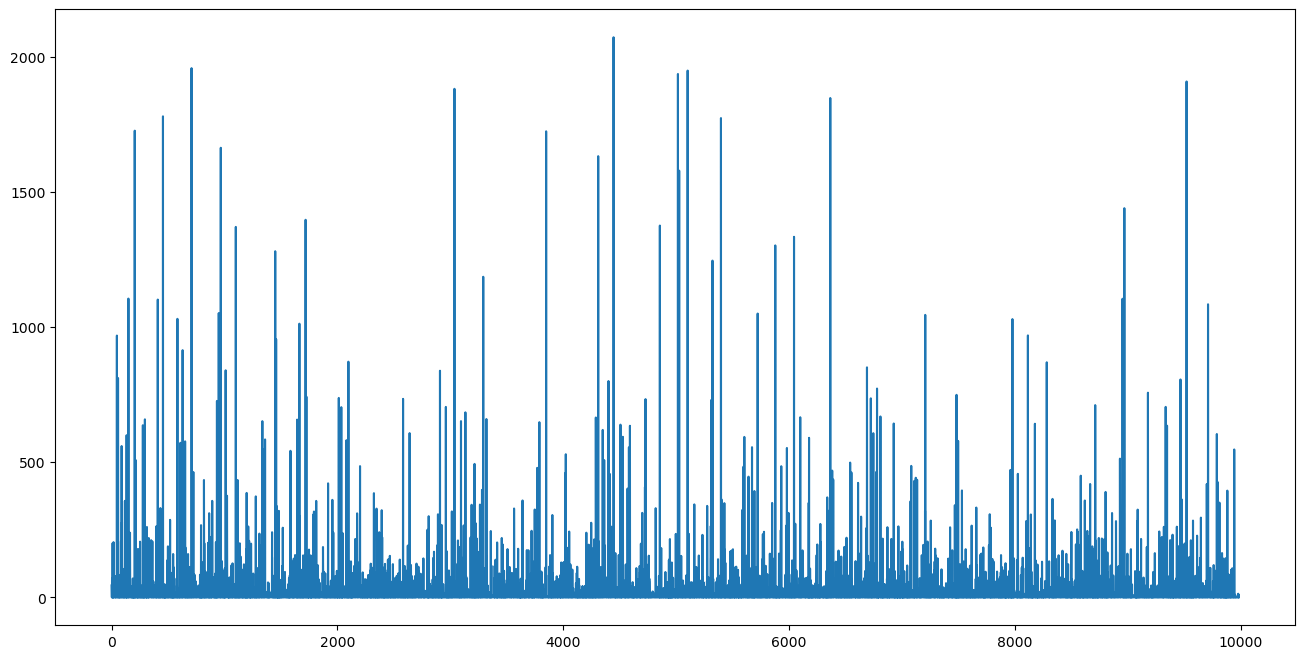

In [35]:
df[df['ARI_CO']=='KR'].CI_HOUR.reset_index()['CI_HOUR'].plot(figsize=(16,8))

In [40]:
kr = df[df['ARI_CO']=='KR']

In [41]:
kr.reset_index(inplace=True, drop=True)

In [60]:
kr.ATA.reset_index().set_index('ATA').sort_index()

,index
ATA,
2014-09-12 16:40,216
2014-09-12 2:44,4631
2014-09-17 2:41,382
2014-09-19 15:42,8082
2014-09-24 13:10,1559
...,...
2023-02-28 5:18,4393
2023-02-28 5:29,6534
2023-02-28 6:15,4710


In [90]:
kr[kr['ARI_PO']=='BGD2'].sort_values(by='ATA')

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR
8082,KR,BGD2,Container,0.000000,2014-09-19 15:42,J548467,30.0,10,23900,20.0,...,NaN,NaN,NaN,0,95.42,98.39,92.41,1062.515212,0.000244,0.000000
505,KR,BGD2,Container,0.000000,2014-09-26 21:20,I717784,50.0,10,142000,30.0,...,NaN,NaN,NaN,6,94.91,97.00,93.54,1036.817170,0.000244,0.000000
3196,KR,BGD2,Bulk,0.000000,2014-09-29 12:22,H615556,60.0,9,251000,30.0,...,NaN,NaN,NaN,21,94.90,97.20,94.57,1049.666191,0.000244,0.000000
1071,KR,BGD2,Bulk,20.405961,2014-10-02 13:14,K785626,20.0,10,19000,10.0,...,NaN,NaN,NaN,22,90.88,92.11,88.85,1003.410626,0.000244,125.603056
2159,KR,BGD2,Container,0.000000,2014-11-10 12:26,M147446,40.0,10,60200,20.0,...,NaN,NaN,NaN,21,80.08,82.34,77.40,1404.453239,0.000244,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,KR,BGD2,Container,40.335566,2023-02-27 8:25,Y728845,20.0,8,12500,10.0,...,0.31,0.1,0.549086,17,82.21,82.45,75.68,727.544240,0.000244,12.902778
2313,KR,BGD2,Cargo,0.000000,2023-02-28 2:19,O534231,10.0,25,2290,10.0,...,0.44,5.7,0.938653,11,81.92,83.89,77.05,770.340960,0.000244,0.000000
4393,KR,BGD2,Container,0.000000,2023-02-28 5:18,Q713174,30.0,5,37600,20.0,...,0.34,10.9,2.440944,14,81.92,83.89,77.05,770.340960,0.000244,0.000000
6534,KR,BGD2,Container,0.000000,2023-02-28 5:29,M845715,20.0,18,13000,10.0,...,0.34,10.9,2.440944,14,81.92,83.89,77.05,770.340960,0.000244,0.000000


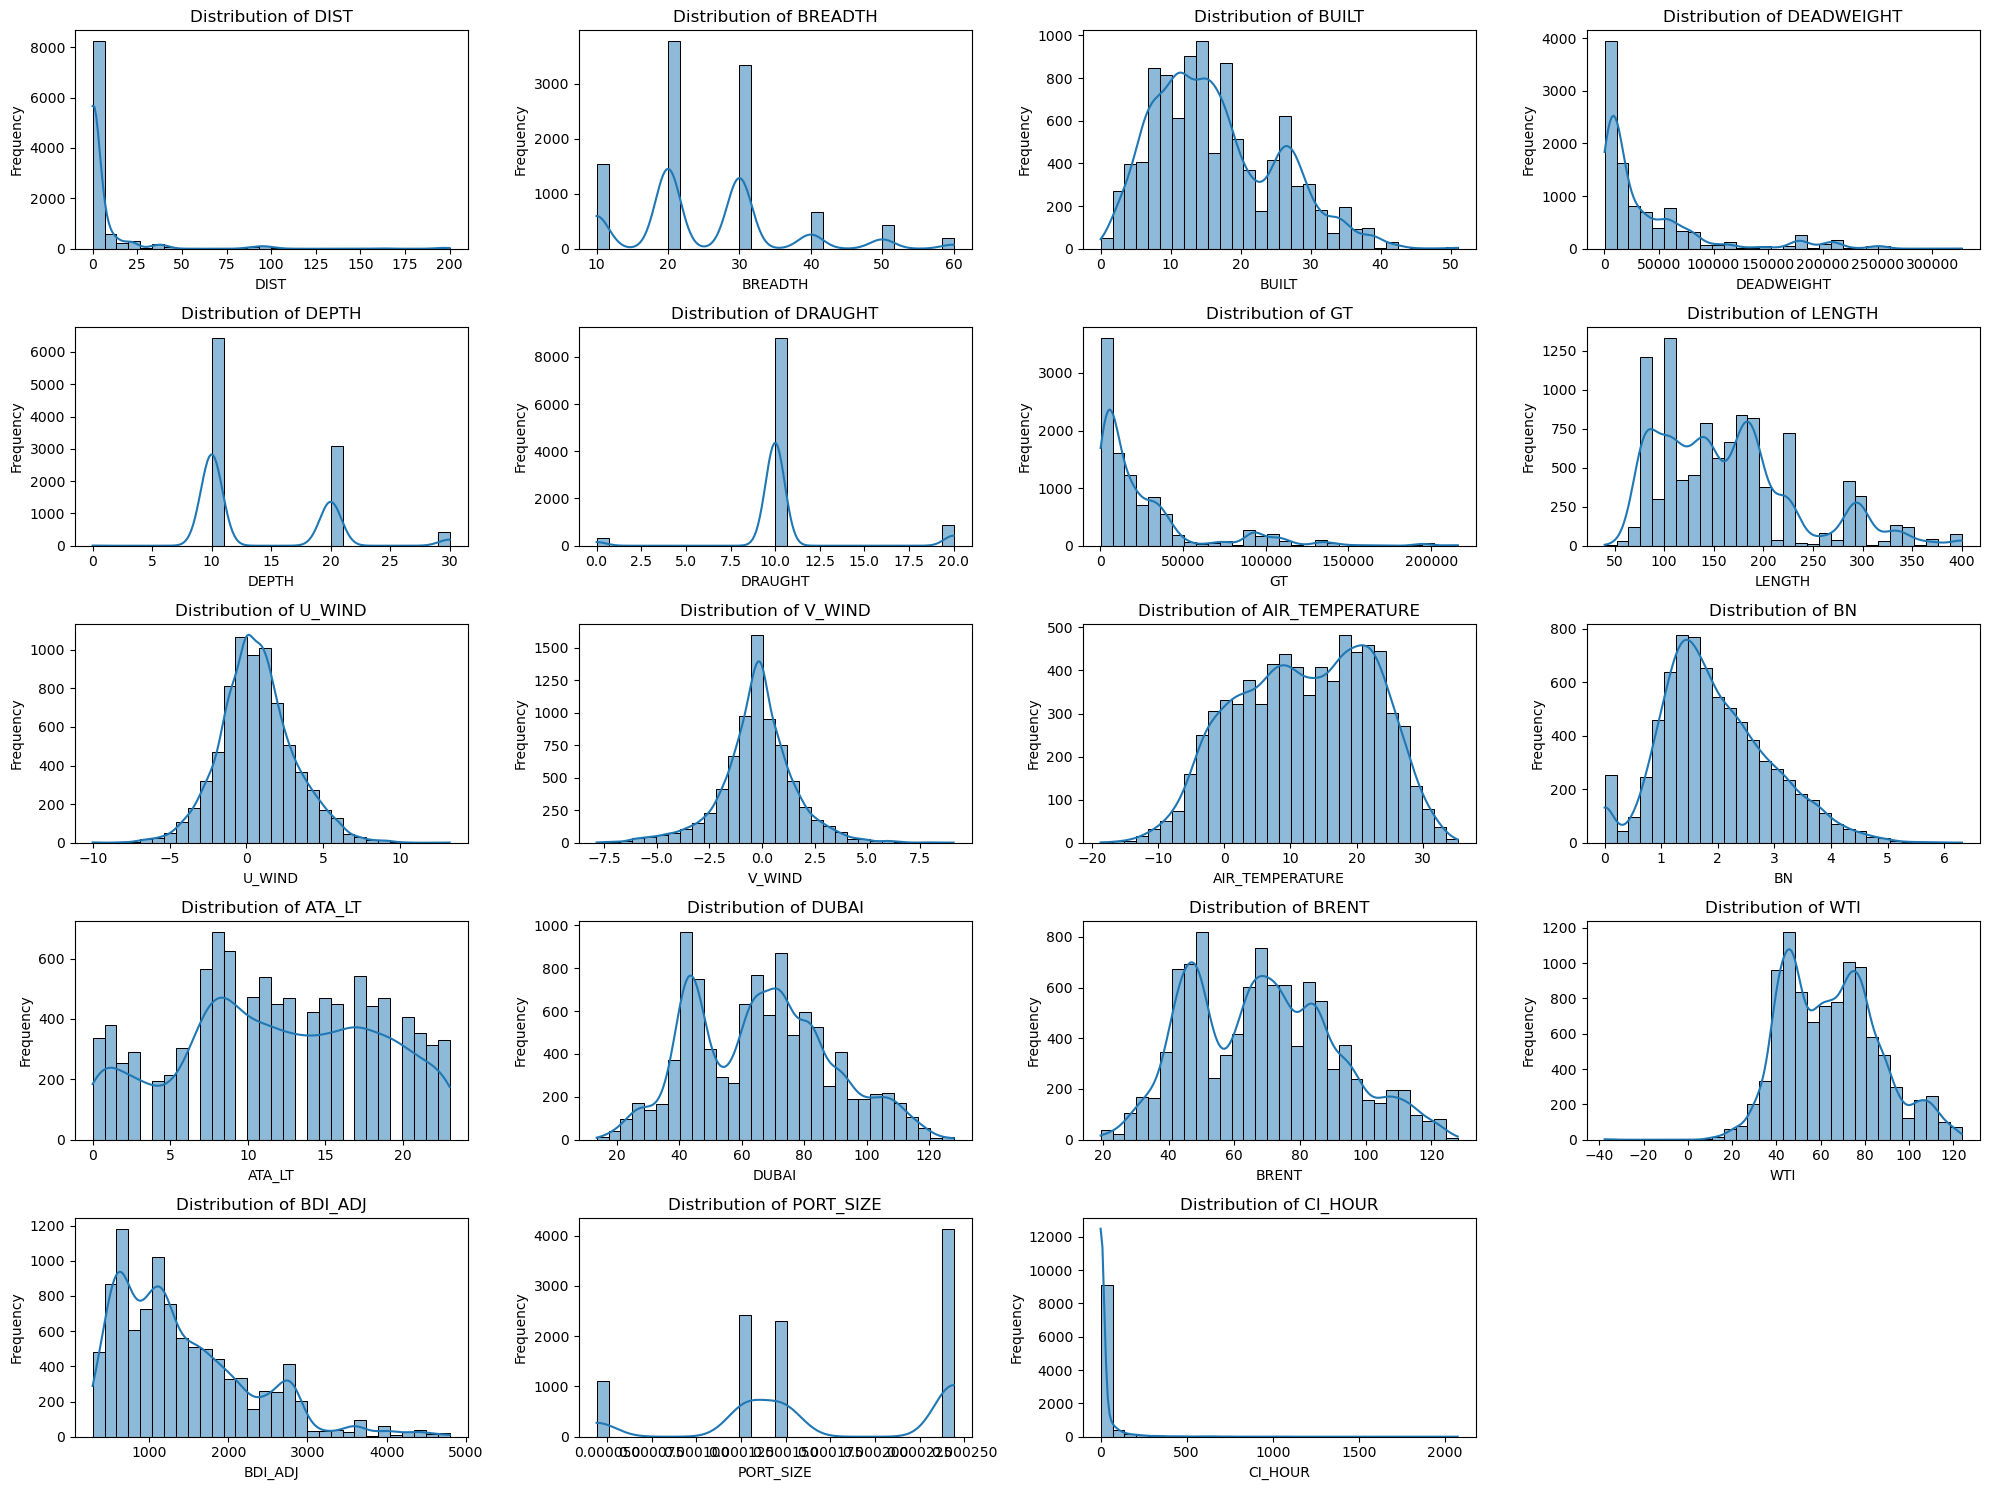

In [62]:
# 샘플링된 데이터로 수치형 변수의 분포를 확인
plt.figure(figsize = (20, 15))

for i, var in enumerate(numeric_columns):
    plt.subplot(5, 4, i+1)
    sns.histplot(kr[var], bins = 30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

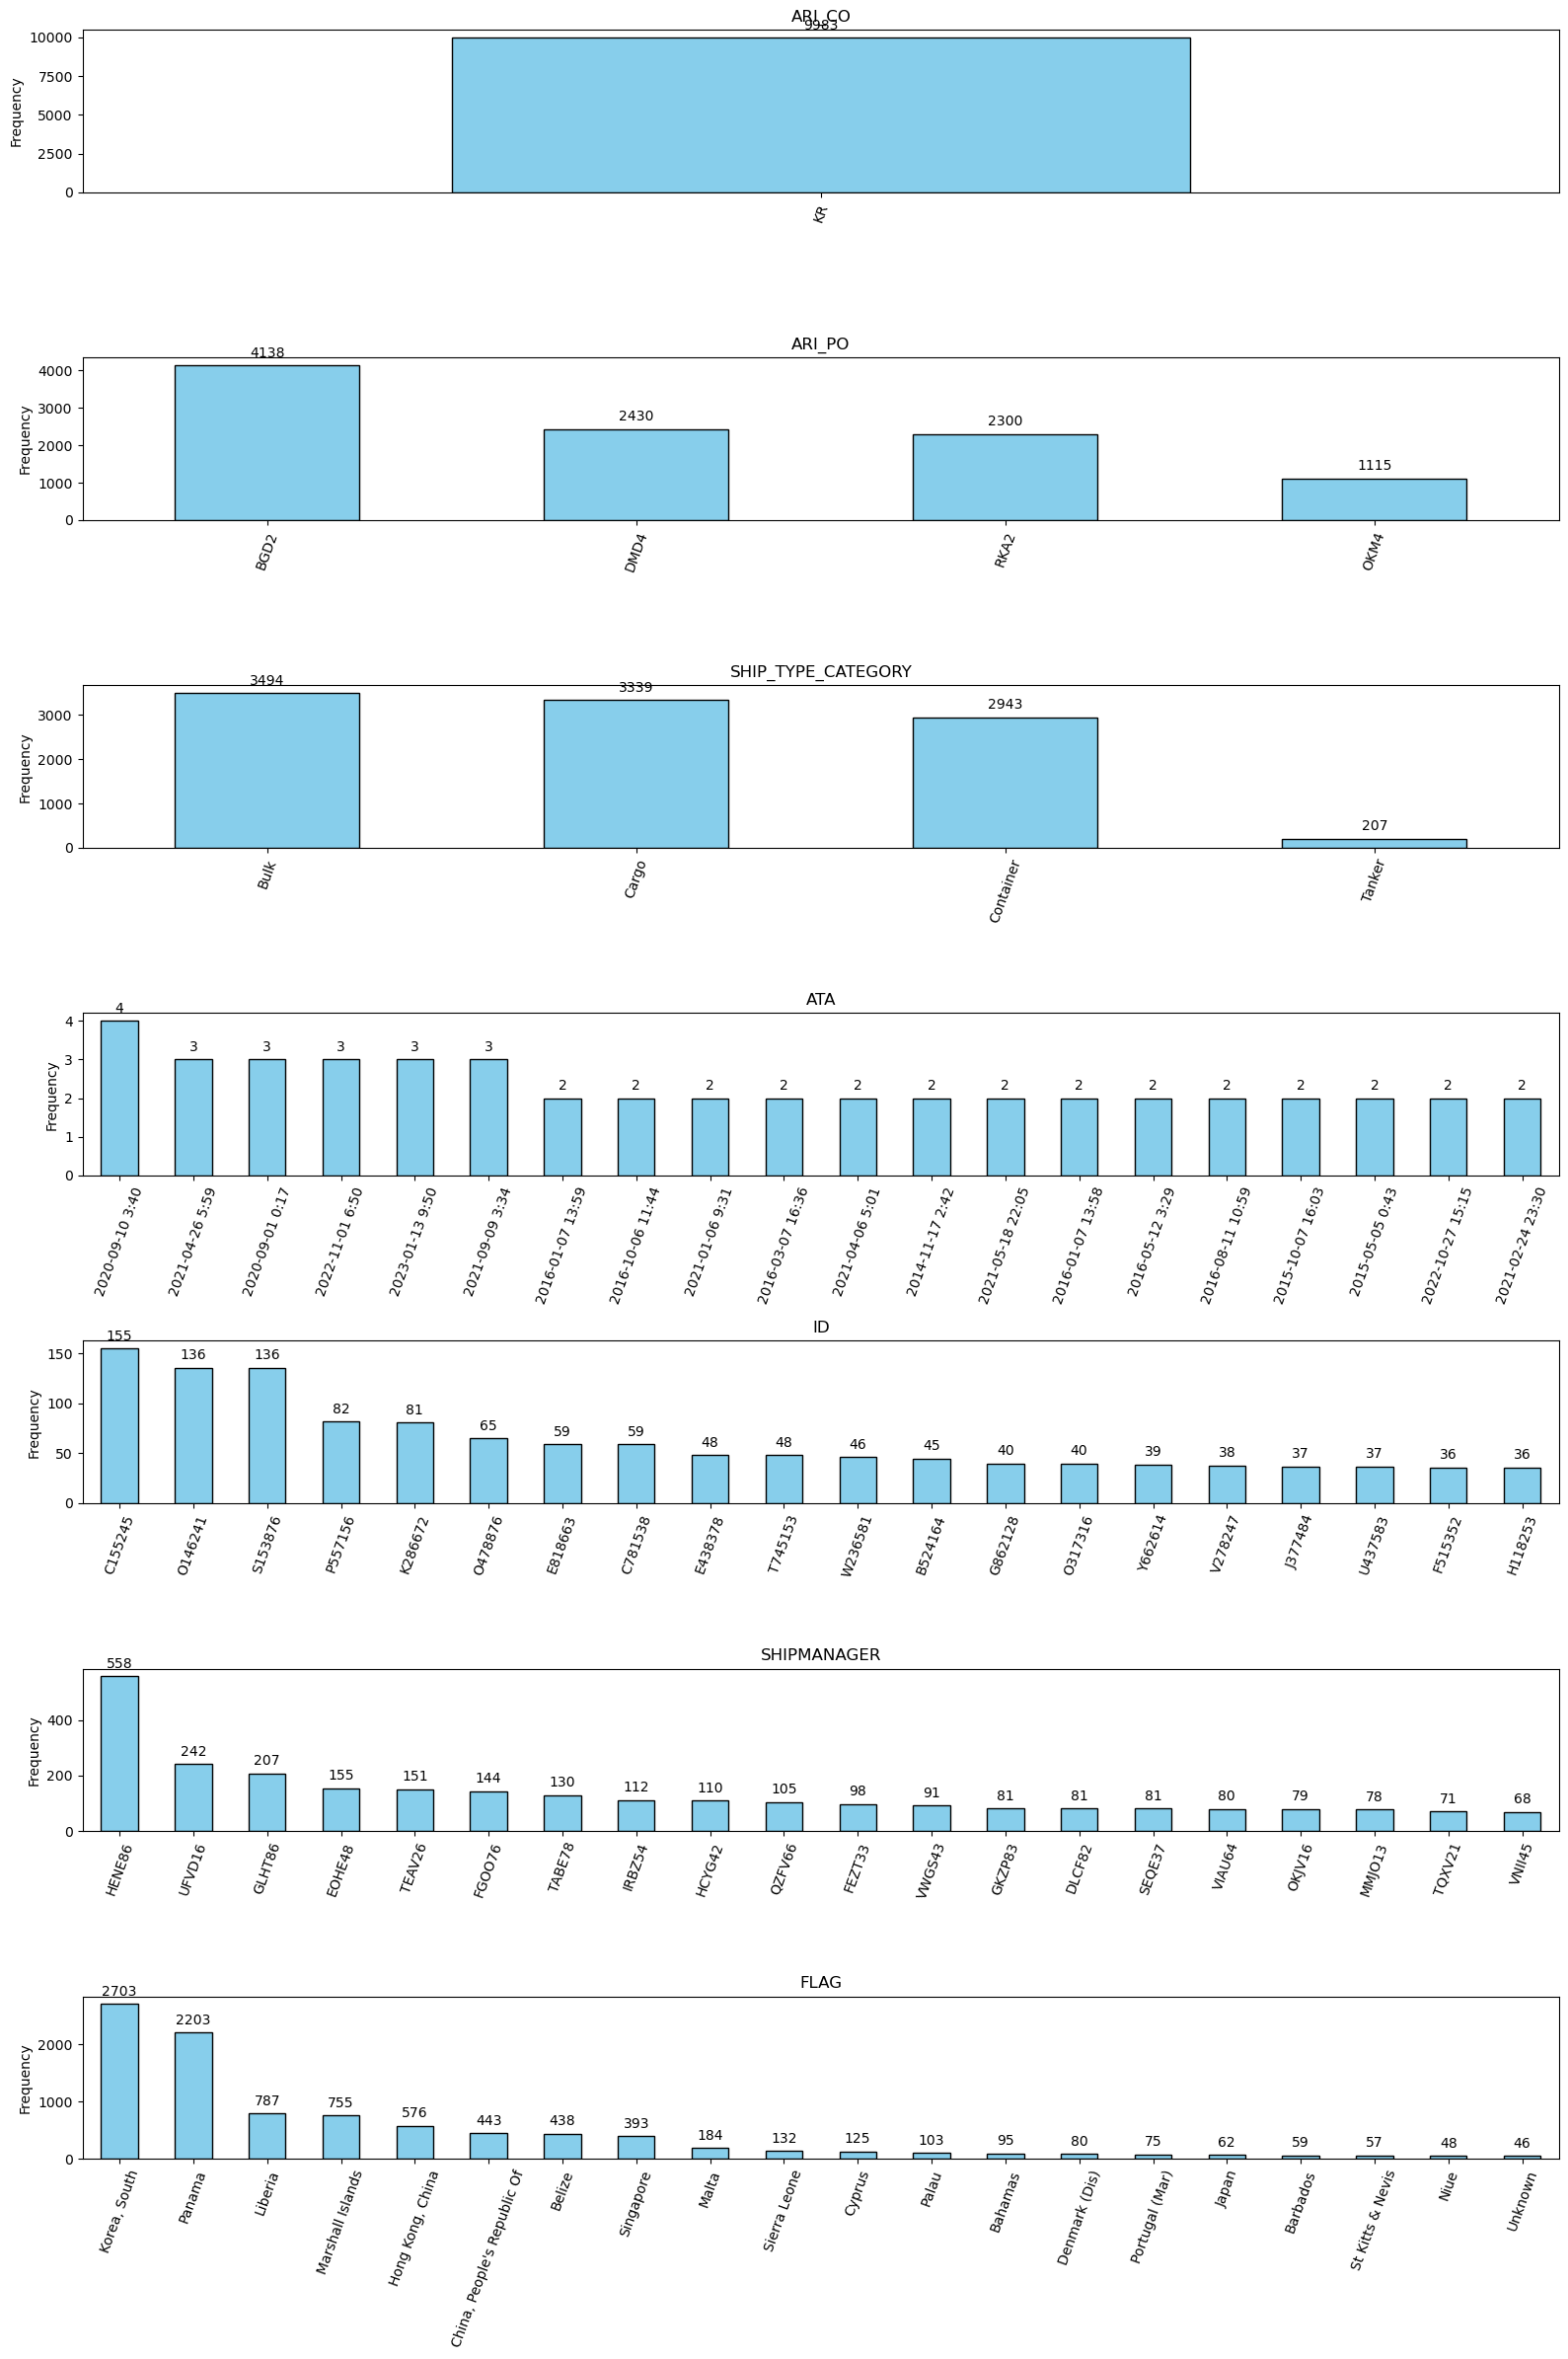

In [91]:
# 위에 코드 너무 오래걸려서 top n개 선정해서 plot

top_n = 20

plt.figure(figsize=(16, 24))

for i, cat_var in enumerate(categorical_vars):
    # 상위 N개의 고유한 값과 그 빈도를 선택합니다.
    top_values = kr[cat_var].value_counts().nlargest(top_n)
    
    ax = plt.subplot(len(categorical_vars), 1, i+1)
    top_values.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(cat_var)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    
    # 각 막대 위에 값을 표시
    for p in ax.patches:
        ax.annotate(str(p.get_height()), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', 
                    va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

# 그래프를 화면에 표시합니다.
plt.tight_layout()
plt.show()

In [115]:
kr[kr['ATA']>='2023']

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR
11,KR,BGD2,Bulk,0.000000,2023-02-06 13:26,O432566,30.0,18,56100,20.0,...,-1.29,9.1,3.651964,22,78.36,80.99,74.11,473.098287,0.000244,0.000000
24,KR,RKA2,Cargo,0.000000,2023-02-06 9:41,P286645,20.0,1,14400,10.0,...,-2.07,3.6,1.863812,18,78.36,80.99,74.11,473.098287,0.000149,0.000000
30,KR,RKA2,Cargo,0.000000,2023-02-03 3:55,B524164,20.0,26,8710,10.0,...,-1.34,0.4,2.831041,12,79.77,79.94,73.39,483.213875,0.000149,0.000000
54,KR,BGD2,Container,89.509110,2023-01-10 19:55,V164263,20.0,2,13300,10.0,...,1.17,10.4,2.409679,4,79.53,84.03,78.39,762.257247,0.000244,40.872222
58,KR,DMD4,Bulk,13.939322,2023-02-02 5:27,D287714,50.0,11,206000,20.0,...,1.26,10.4,1.861984,14,80.46,83.69,77.14,467.651432,0.000128,121.414722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,KR,BGD2,Bulk,0.000000,2023-01-09 9:19,Q682282,30.0,8,63700,20.0,...,-2.85,3.2,2.560507,18,77.09,79.65,74.63,889.560455,0.000244,0.000000
9892,KR,BGD2,Cargo,1.885768,2023-02-10 3:46,K661186,10.0,12,3420,10.0,...,-0.66,1.0,1.478349,12,84.43,86.61,80.14,479.323264,0.000244,84.265278
9898,KR,OKM4,Cargo,0.000000,2023-01-18 5:59,P557156,20.0,39,10200,10.0,...,0.70,-1.9,1.941215,14,83.70,84.98,79.48,682.595117,0.000044,0.000000
9907,KR,BGD2,Bulk,100.936969,2023-01-08 18:09,R824717,50.0,9,188000,20.0,...,-0.55,3.5,0.924641,3,76.84,82.67,77.41,814.584333,0.000244,54.095278


In [100]:
dd = pd.read_excel('C:\\Users\\user\\Downloads/download_kr.xlsx')

In [116]:
dd

,항명,호출부호,선명,입항횟수,입항횟수.1,구분,외내,입출,총톤수,입항일시,...,차항지,전출항지,선박용도,외항:한국인선원수\n내항:해기사선원수,외항:외국인선원수\n내항:보통선원수,승객,예선,도선,부선호출부호1,부선호출부호2
0,부산,3FOP6,SUN RIO,2022,19,최종,외항,출항,"7,580",2022-09-16 13:40,...,VLADIVOSTOK,IMARI,자동차운반선,NaN,17.0,NaN,Y,Y,NaN,NaN
1,부산,UBHE3,ANATOLIY LARIN,2022,3,최종,외항,출항,"4,295",2022-11-04 10:45,...,OKHOTSK,VLADIVOSTOK,냉동.냉장선,NaN,25.0,6.0,Y,Y,NaN,NaN
2,부산,UCCY,ANATOLIY TORCHINOV,2022,1,최종,외항,출항,854,2022-11-08 08:20,...,OCEAN DISTRICT,KHOLMSK,원양 어선,NaN,22.0,NaN,Y,Y,NaN,NaN
3,부산,UBOR,LYRA,2022,7,최종,외항,출항,"2,545",2022-11-09 21:00,...,OKHOTSK,VLADIVOSTOK,냉동.냉장선,NaN,23.0,NaN,Y,Y,NaN,NaN
4,부산,UBCV7,DANIDIN,2022,4,최종,외항,출항,"5,578",2022-11-21 12:35,...,OKHOTSK,VLADIVOSTOK,냉동.냉장선,NaN,22.0,NaN,Y,Y,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,포항,186803,금광11호,2023,82,최종,내항,입항,"2,198",2023-07-30 01:20,...,기타항,기타항,일반화물선,2.0,2.0,0.0,N,N,NaN,NaN
49996,부산,DSQG4,PEGASUS PACER,2023,40,최종,외항,입항,"7,406",2023-07-30 01:36,...,OSAKA,KOBE,풀컨테이너선,4.0,13.0,NaN,Y,Y,NaN,NaN
49997,부산,DSQG4,PEGASUS PACER,2023,40,최종,외항,출항,"7,406",2023-07-30 01:36,...,OSAKA,KOBE,풀컨테이너선,4.0,13.0,NaN,Y,Y,NaN,NaN
49998,인천,102740,미래9호,2023,77,최종,내항,입항,"4,657",2023-07-30 02:00,...,기타항,기타항,일반화물선,6.0,1.0,9.0,Y,Y,NaN,NaN


In [123]:
kr.sort_values(by='ATA', ascending=False)

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR
3347,KR,RKA2,Container,0.0,2023-02-28 7:57,U437583,20.0,21,8410,10.0,...,1.44,9.6,3.181381,16,81.92,83.89,77.05,770.340960,0.000149,0.0
1783,KR,DMD4,Cargo,0.0,2023-02-28 7:26,L781842,20.0,3,5360,10.0,...,1.28,13.2,2.749473,16,81.92,83.89,77.05,770.340960,0.000128,0.0
4710,KR,BGD2,Container,0.0,2023-02-28 6:15,F815115,30.0,12,33400,20.0,...,0.50,13.1,2.629791,15,81.92,83.89,77.05,770.340960,0.000244,0.0
6534,KR,BGD2,Container,0.0,2023-02-28 5:29,M845715,20.0,18,13000,10.0,...,0.34,10.9,2.440944,14,81.92,83.89,77.05,770.340960,0.000244,0.0
4393,KR,BGD2,Container,0.0,2023-02-28 5:18,Q713174,30.0,5,37600,20.0,...,0.34,10.9,2.440944,14,81.92,83.89,77.05,770.340960,0.000244,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,KR,OKM4,Bulk,0.0,2014-09-24 13:10,Q368246,30.0,29,69100,20.0,...,NaN,NaN,NaN,22,94.84,96.95,92.80,1043.735873,0.000044,0.0
8082,KR,BGD2,Container,0.0,2014-09-19 15:42,J548467,30.0,10,23900,20.0,...,NaN,NaN,NaN,0,95.42,98.39,92.41,1062.515212,0.000244,0.0
382,KR,RKA2,Bulk,0.0,2014-09-17 2:41,P711565,30.0,23,28400,10.0,...,NaN,NaN,NaN,11,96.46,98.97,94.42,1110.946138,0.000149,0.0
4631,KR,DMD4,Bulk,0.0,2014-09-12 2:44,O237676,30.0,11,56400,20.0,...,NaN,NaN,NaN,11,95.89,97.11,92.27,1167.284154,0.000128,0.0


In [142]:
kr

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR
0,KR,BGD2,Cargo,3.382509,2021-05-26 11:53,X711122,10.0,6,3570,10.0,...,0.03,16.3,3.312490,20,67.41,69.63,66.32,2269.860842,0.000244,43.900278
1,KR,BGD2,Cargo,23.528993,2022-12-22 19:31,Z215368,20.0,18,10400,10.0,...,-3.69,-3.0,4.441279,4,78.11,83.92,79.56,1189.335045,0.000244,5.404722
2,KR,DMD4,Cargo,0.000000,2021-03-22 1:55,A754888,10.0,6,3640,10.0,...,-2.12,3.9,3.442176,10,63.18,64.62,61.55,2054.679485,0.000128,0.000000
3,KR,BGD2,Container,0.000000,2015-10-01 6:35,F262387,20.0,11,11900,10.0,...,NaN,NaN,NaN,15,45.92,47.69,44.74,876.741858,0.000244,0.000000
4,KR,BGD2,Bulk,21.530681,2022-12-09 6:40,S276755,30.0,5,50700,20.0,...,-1.63,8.7,1.688172,15,71.83,77.99,73.17,1068.438941,0.000244,70.876111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,KR,RKA2,Container,0.000000,2019-09-23 3:19,E438378,20.0,16,8710,10.0,...,-2.00,21.9,2.065747,12,63.59,64.77,58.64,1928.913973,0.000149,0.000000
9979,KR,BGD2,Cargo,0.000000,2022-11-10 9:10,Y242153,20.0,25,7350,10.0,...,0.32,15.2,1.135784,18,87.18,93.67,86.47,1092.637627,0.000244,0.000000
9980,KR,RKA2,Cargo,0.000000,2021-12-13 2:26,G658643,10.0,18,3650,10.0,...,-3.76,-2.1,2.962844,11,74.11,74.39,71.29,2687.402066,0.000149,0.000000
9981,KR,DMD4,Cargo,5.254744,2021-10-01 12:15,P637616,10.0,16,2700,10.0,...,-0.64,15.2,0.843609,21,75.68,79.28,75.88,4415.591664,0.000128,9.346944


In [146]:
from datetime import datetime, timedelta

In [154]:
kr['ATA_2'] = pd.to_datetime(kr['ATA']) + timedelta(hours=9)

C:\Users\user\AppData\Local\Temp\ipykernel_15764\4058580444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kr['ATA_2'] = pd.to_datetime(kr['ATA']) + timedelta(hours=9)


In [167]:
kr.ARI_PO.value_counts()

BGD2    4138
DMD4    2430
RKA2    2300
OKM4    1115
Name: ARI_PO, dtype: int64

In [160]:
dd['입항일시_2'] = pd.to_datetime(dd['입항일시'])

In [179]:
pd.merge(dd, kr, left_on = '입항일시_2', right_on = 'ATA_2', how = 'inner').head(10)

,항명,호출부호,선명,입항횟수,입항횟수.1,구분,외내,입출,총톤수,입항일시,출항일시,CIQ수속일자,수리일시,항해구분,MRN 번호,계선장소,계선장소.1,계선장소.2,차항지,전출항지,선박용도,외항:한국인선원수\n내항:해기사선원수,외항:외국인선원수\n내항:보통선원수,승객,예선,도선,부선호출부호1,부선호출부호2,입항일시_2,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR,ATA_2
0,부산,UIUT,KORSAKOV,2022,7,최종,외항,출항,"12,383",2022-12-27 22:30,2023-01-06 22:05,2023-01-06 21:00,2023-01-10 13:00,기타,23GSSBM997E,MK2,04,감천 2부두 4선석,OKHOTSK,VLADIVOSTOK,냉동.냉장선,NaN,31.0,NaN,Y,Y,NaN,NaN,2022-12-27 22:30:00,KR,DMD4,Cargo,7.768572,2022-12-27 13:30,O666283,20.0,31,8060,10.0,10.0,4800,110.0,NWUS36,"Korea, South",1.64,0.63,-3.5,1.640657,22,80.63,84.33,79.53,1189.335045,0.000128,10.052500,2022-12-27 22:30:00
1,부산,DSPF5,TAELIM JASMINE,2022,137,최종,외항,출항,465,2022-12-29 01:00,2023-01-03 20:30,2023-01-03 19:00,2023-01-04 11:05,기타,23SYSPB137E,MK4,01,감천 4부두1선석(국제수산물부두),SHIMONOSEKI,SHIMONOSEKI,냉동.냉장선,4.0,5.0,NaN,N,N,NaN,NaN,2022-12-29 01:00:00,KR,RKA2,Container,0.000000,2022-12-28 16:00,K286672,30.0,6,11600,10.0,10.0,19500,180.0,SEQE37,Liberia,-0.19,-1.05,-6.8,1.176665,1,80.00,83.26,78.96,1189.335045,0.000149,0.000000,2022-12-29 01:00:00
2,인천,C6VG9,MYRIAD,2023,1,최종,외항,출항,"5,403",2023-01-02 21:25,2023-01-03 04:05,2023-01-03 00:00,2023-01-03 16:15,기타,23CKCO0010E,MBE,01,남항 E1컨테이너부두,부산,부산,풀컨테이너선,NaN,17.0,NaN,Y,Y,NaN,NaN,2023-01-02 21:25:00,KR,BGD2,Bulk,21.476842,2023-01-02 12:25,W253645,10.0,19,2850,10.0,10.0,2000,80.0,TTXI34,Belize,1.39,-0.47,6.0,1.455047,21,75.19,78.69,73.67,895.027464,0.000244,63.955833,2023-01-02 21:25:00
3,인천,C6VG9,MYRIAD,2023,1,최종,외항,입항,"5,403",2023-01-02 21:25,2023-01-03 04:05,2023-01-02 21:00,2023-01-03 13:16,기타,23CKCO0007I,MBE,01,남항 E1컨테이너부두,부산,부산,풀컨테이너선,NaN,17.0,NaN,Y,Y,NaN,NaN,2023-01-02 21:25:00,KR,BGD2,Bulk,21.476842,2023-01-02 12:25,W253645,10.0,19,2850,10.0,10.0,2000,80.0,TTXI34,Belize,1.39,-0.47,6.0,1.455047,21,75.19,78.69,73.67,895.027464,0.000244,63.955833,2023-01-02 21:25:00
4,부산,VRSR7,TS YOKOHAMA,2023,1,최종,외항,입항,"9,587",2023-01-02 21:25,2023-01-03 08:00,2023-01-02 22:00,2023-01-03 08:54,기타,23TSLUBA02I,MBR,02,감만부두 2선석,광양,MOJI/KITAKYUSHU,풀컨테이너선,NaN,19.0,NaN,Y,Y,NaN,NaN,2023-01-02 21:25:00,KR,BGD2,Bulk,21.476842,2023-01-02 12:25,W253645,10.0,19,2850,10.0,10.0,2000,80.0,TTXI34,Belize,1.39,-0.47,6.0,1.455047,21,75.19,78.69,73.67,895.027464,0.000244,63.955833,2023-01-02 21:25:00
5,부산,VRSR7,TS YOKOHAMA,2023,1,최종,외항,출항,"9,587",2023-01-02 21:25,2023-01-03 08:00,2023-01-03 06:00,2023-01-03 09:43,기타,23TSLUB002E,MBR,04,감만부두 4선석,광양,MOJI/KITAKYUSHU,풀컨테이너선,NaN,19.0,NaN,Y,Y,NaN,NaN,2023-01-02 21:25:00,KR,BGD2,Bulk,21.476842,2023-01-02 12:25,W253645,10.0,19,2850,10.0,10.0,2000,80.0,TTXI34,Belize,1.39,-0.47,6.0,1.455047,21,75.19,78.69,73.67,895.027464,0.000244,63.955833,2023-01-02 21:25:00
6,인천,V2HI4,JAN,2023,1,최종,외항,출항,"17,280",2023-01-04 12:05,2023-01-05 04:00,2023-01-05 02:00,2023-01-05 09:11,기타,23SMLM7001E,MSB,03,신항 선광신컨테이너터미널 3선석,QINGDAO,SHEKOU PT,풀컨테이너선,NaN,22.0,NaN,Y,Y,NaN,NaN,2023-01-04 12:05:00,KR,DMD4,Bulk,0.000000,2023-01-04 3:05,W122328,30.0,13,81500,20.0,10.0,42600,220.0,LILB31,Marshall Islands,4.26,-1.14,2.1,3.030271,12,77.10,77.84,72.84,918.457503,0.000128,0.000000,2023-01-04 12:05:00
7,인천,V2HI4,JAN,2023,1,최종,외항,입항,"17,280",2023-01-04 12:05,2023-01-05 04:00,2023-01-04 12:00,2023-01-05 09:05,기타,23SMLMI001I,MSB,03,신항 선광신컨테이너터미널 3선석,QINGDAO,SHEKOU PT,풀컨테이너선,NaN,22.0,NaN,Y,Y,NaN,NaN,2023-01-04 12:05:00,KR,DMD4,Bulk,0.000000,2023-01-04 3:05,W122328,30.0,13,81500,20.0,10.0,42600,220.0,LILB31,Marshall Islands,4.26,-1.14,2.1,3.030271,12,77.10,77.84,72.84,918.457503,0.000128,0.000000,2023-01-04 12:05:00
8,인천,DSMA4,KMTC TIANJIN,2023,1,최종,외항,입항,"28,927",2023-01-05 07:25,2023-01-06 03:00,2023-01-05 07:25,2023-01-09 09:12,기타,23KMTCSW01I,MBI,02,남항 인천컨테이너터미널 2부두,QINGDAO,부산,풀컨테이너선,2.0,19.0,NaN,Y,Y,NaN,NaN,2023-01-05 07:25:00,KR,RKA2,Cargo,0.000000,2023-01-04 22:25,P785724,10.0,17,3380,10.0,10.0,1970,80.0,HTJH21,St Vincent & The Grenadines,-1.08,0

In [177]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

In [170]:
kr[kr['ATA_2']=='2022-12-27 22:30:00']

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR,ATA_2
5869,KR,DMD4,Cargo,7.768572,2022-12-27 13:30,O666283,20.0,31,8060,10.0,...,-3.5,1.640657,22,80.63,84.33,79.53,1189.335045,0.000128,10.0525,2022-12-27 22:30:00
